In [1]:
pip install matplotlib ipykernel

  Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached numpy-2.3.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.7 MB/s eta 0:00:00
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached numpy-2.3.2-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached pillow-11.3.0-cp312-cp312-macos

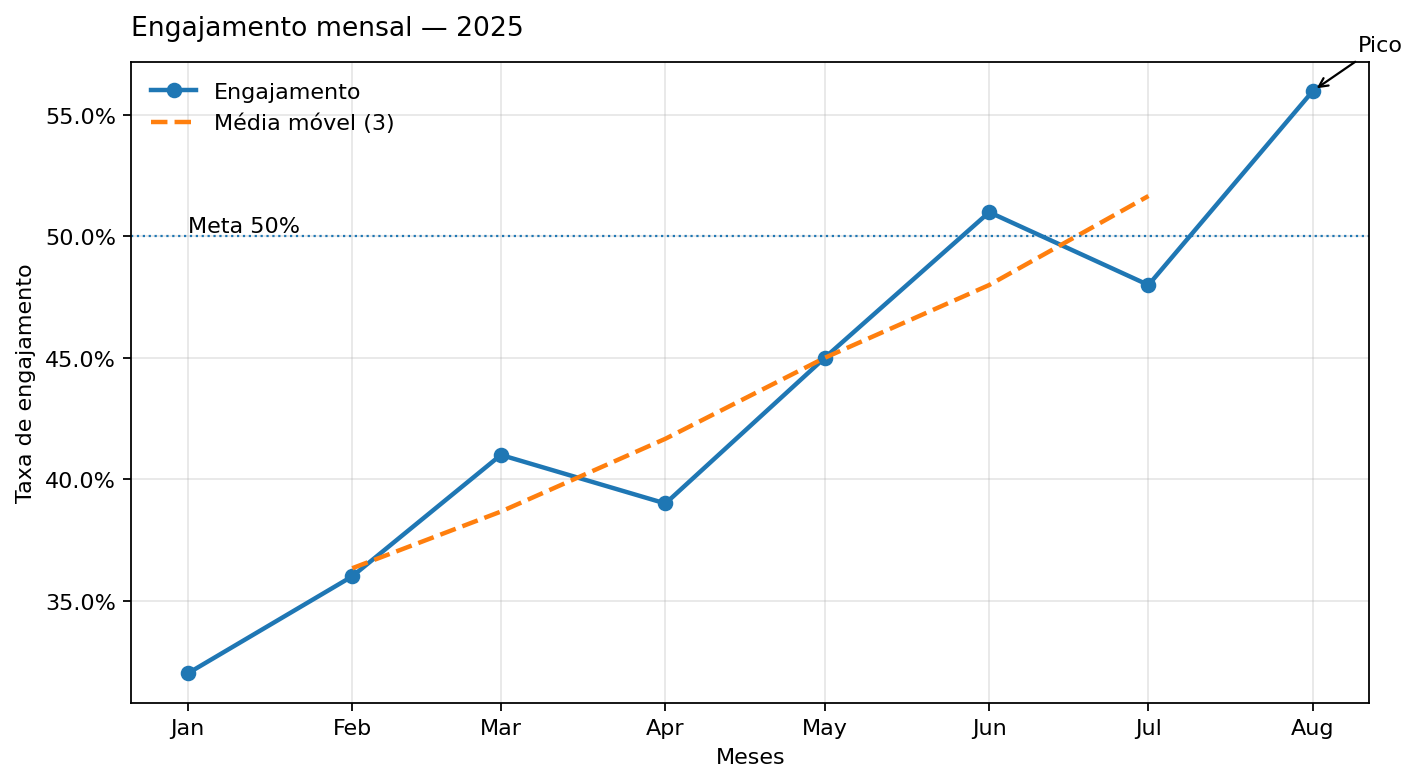

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter

# Dados de exemplo (8 meses)
meses = [dt.date(2025, m, 1) for m in range(1, 9)]
y = np.array([0.32, 0.36, 0.41, 0.39, 0.45, 0.51, 0.48, 0.56])  # taxas (0–1)

# Média móvel simples (janela=3)
ma = np.convolve(y, np.ones(3)/3, mode='valid')
ma_x = meses[1:-1]

fig, ax = plt.subplots(figsize=(9, 5), dpi=160)

# Série principal + média móvel
ax.plot(meses, y, marker='o', linewidth=2, label='Engajamento')
ax.plot(ma_x, ma, linestyle='--', linewidth=2, label='Média móvel (3)')

# Título e rótulos
ax.set_title('Engajamento mensal — 2025', loc='left', pad=12)
ax.set_xlabel('Meses')
ax.set_ylabel('Taxa de engajamento')

# Formatações elegantes
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.legend(frameon=False)

# Linha de meta e anotação do pico
ax.axhline(0.50, linestyle=':', linewidth=1)
ax.text(meses[0], 0.50, 'Meta 50%', va='bottom', ha='left')
pico = int(np.argmax(y))
ax.annotate('Pico',
            xy=(meses[pico], y[pico]),
            xytext=(20, 18), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', lw=1))

fig.tight_layout()
plt.show()